<a href="https://colab.research.google.com/github/MalihehMaleki/Machinelearning2023/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from ast import literal_eval
df = pd.read_csv('/content/movies_metadata.csv')
print(df)

       adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 

<ipython-input-4-6f4e3b3f29ce>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/movies_metadata.csv')


<ipython-input-6-e51366bfa74e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = temp, palette = 'viridis')


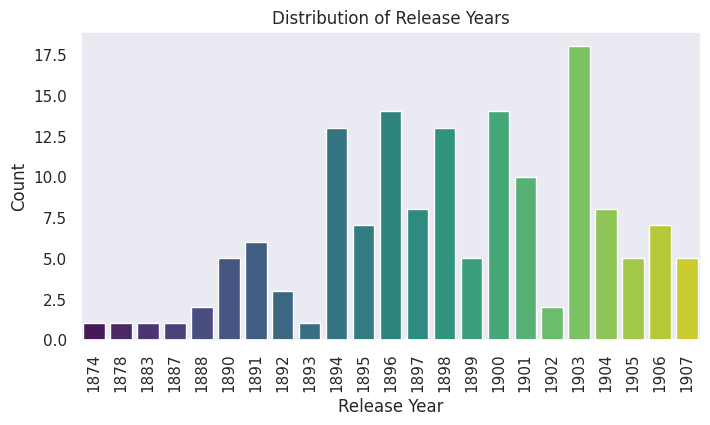

In [6]:
# نمودار تعداد فیلم های منتشر شده در هر سال
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

temp = df['year'].sort_values().head(150)
sns.set(style="dark")
plt.figure(figsize=(8, 4))
sns.countplot(x = temp, palette = 'viridis')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Release Years')
plt.xticks(rotation = 90)
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['genres'] = df['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')

C = vote_averages.mean()
m = vote_counts.quantile(0.8)




In [8]:
movies =df[(df['vote_count'] >= m)][['id','title','adult','genres']]
movies.columns


Index(['id', 'title', 'adult', 'genres'], dtype='object')

In [9]:
import pandas as pd
def list_to_string(my_list):
  return ','.join(my_list)
movies['genre'] = movies['genres'].apply(list_to_string)
movies['tags']=movies['genre']+movies['adult']
new_movies = movies.drop(columns=['genres','genre','adult'])

new_movies


,id,title,tags
0,862,Toy Story,"Animation,Comedy,FamilyFalse"
1,8844,Jumanji,"Adventure,Fantasy,FamilyFalse"
2,15602,Grumpier Old Men,"Romance,ComedyFalse"
4,11862,Father of the Bride Part II,ComedyFalse
5,949,Heat,"Action,Crime,Drama,ThrillerFalse"
...,...,...,...
45339,430365,With Open Arms,ComedyFalse
45343,248705,The Visitors: Bastille Day,ComedyFalse
45348,44918,Titanic 2,"Action,Adventure,ThrillerFalse"
45437,455661,In a Heartbeat,"Family,Animation,Romance,ComedyFalse"


In [10]:
new_movies = new_movies.reset_index(drop=True)
new_movies

,id,title,tags
0,862,Toy Story,"Animation,Comedy,FamilyFalse"
1,8844,Jumanji,"Adventure,Fantasy,FamilyFalse"
2,15602,Grumpier Old Men,"Romance,ComedyFalse"
3,11862,Father of the Bride Part II,ComedyFalse
4,949,Heat,"Action,Crime,Drama,ThrillerFalse"
...,...,...,...
9146,430365,With Open Arms,ComedyFalse
9147,248705,The Visitors: Bastille Day,ComedyFalse
9148,44918,Titanic 2,"Action,Adventure,ThrillerFalse"
9149,455661,In a Heartbeat,"Family,Animation,Romance,ComedyFalse"


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=9151, stop_words='english')
vector=cv.fit_transform(new_movies['tags'].values.astype('U')).toarray()
vector.shape

(9151, 42)

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.33333333, 0.        , ..., 0.        , 0.28867513,
        0.        ],
       [0.33333333, 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.70710678,
        0.70710678],
       ...,
       [0.        , 0.33333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.28867513, 0.        , 0.70710678, ..., 0.        , 1.        ,
        0.5       ],
       [0.        , 0.        , 0.70710678, ..., 0.        , 0.5       ,
        1.        ]])

In [13]:
def recommand(movies):
  index=new_movies[new_movies['title']==movies].index[0]
  distance = sorted(list(enumerate(similarity[index])),reverse=True,key=lambda vector:vector[1])
  for i in distance[0:11]:
    print(new_movies.iloc[i[0]].title)

In [14]:
recommand("Inception")

Sky Captain and the World of Tomorrow
Inception
Armageddon
Planet of the Apes
The Island
I Am Number Four
Terminator Genisys
Vice
Transformers: The Last Knight
The Saint
2001: A Space Odyssey


In [15]:
import numpy as np
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)


qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape
print(qualified)

                             title  year  vote_count  vote_average popularity  \
0                        Toy Story  1995        5415             7  21.946943   
1                          Jumanji  1995        2413             6  17.015539   
2                 Grumpier Old Men  1995          92             6    11.7129   
4      Father of the Bride Part II  1995         173             5   8.387519   
5                             Heat  1995        1886             7  17.924927   
...                            ...   ...         ...           ...        ...   
45339               With Open Arms  2017          94             5   7.250495   
45343   The Visitors: Bastille Day  2016         167             4    7.29492   
45348                    Titanic 2  2010          55             3   4.359886   
45437               In a Heartbeat  2017         146             8   20.82178   
45441                  Cadet Kelly  2002         145             5   4.392389   

                           

In [16]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [17]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [18]:

qualified = qualified.sort_values('wr', ascending=False).head(250)

In [19]:
qualified.head(150)

,title,year,vote_count,vote_average,popularity,genres,wr
10309,Dilwale Dulhania Le Jayenge,1995,661,9,34.457024,"[Comedy, Drama, Romance]",8.735928
15480,Inception,2010,14075,8,29.108149,"[Action, Thriller, Science Fiction, Mystery, A...",7.990247
12481,The Dark Knight,2008,12269,8,123.167259,"[Drama, Action, Crime, Thriller]",7.988818
22879,Interstellar,2014,11187,8,32.213481,"[Adventure, Drama, Science Fiction]",7.987741
2843,Fight Club,1999,9678,8,63.869599,[Drama],7.985839
...,...,...,...,...,...,...,...
8559,Il Sorpasso,1962,92,8,4.577991,"[Drama, Comedy]",7.029893
3350,Dersu Uzala,1975,90,8,4.713259,"[Action, Adventure, Drama]",7.016035
36291,Michael Jackson's Thriller,1983,90,8,17.85649,"[Horror, Music]",7.016035
14361,Love Exposure,2008,89,8,5.619382,"[Action, Comedy, Drama, Romance]",7.008956


In [20]:
# پیشنهاد فیلم های برتر بر اساس ژانر

s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True) # add index to the generated  column
s.name = 'genre'
gen_md = df.drop('genres', axis=1).join(s)

def build_chart(genre, percentile=0.85):
    df = gen_md[gen_md['genre'] == genre] # filter by genre value
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)

    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')

    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)

# return the 250 most qualified movies sorted by Weighted rate for the specific genre
    return qualified

<ipython-input-20-5110e6245ade>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True) # add index to the generated  column


In [21]:
build_chart('Animation').head(15)

,title,year,vote_count,vote_average,popularity,wr
359,The Lion King,1994,5520,8,21.605761,7.909339
5481,Spirited Away,2001,3968,8,41.048867,7.875933
9698,Howl's Moving Castle,2004,2049,8,16.136048,7.772103
2884,Princess Mononoke,1997,2041,8,17.166725,7.771305
5833,My Neighbor Totoro,1988,1730,8,13.507299,7.735274
40251,Your Name.,2016,1030,8,34.461252,7.589820
5553,Grave of the Fireflies,1988,974,8,0.010902,7.570962
19901,Paperman,2012,734,8,7.198633,7.465676
39386,Piper,2016,487,8,11.243161,7.285132
20779,Wolf Children,2012,483,8,10.249498,7.281198


In [22]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
def list_to_string(my_list):
    return ', '.join(my_list)

df['genres'] = df['genres'].apply(list_to_string)



In [23]:
data =df[(df['vote_count'] >= m)][['id','title','adult','vote_average','year','genres']]
data

,id,title,adult,vote_average,year,genres
0,862,Toy Story,False,7.7,1995,"Animation, Comedy, Family"
1,8844,Jumanji,False,6.9,1995,"Adventure, Fantasy, Family"
2,15602,Grumpier Old Men,False,6.5,1995,"Romance, Comedy"
4,11862,Father of the Bride Part II,False,5.7,1995,Comedy
5,949,Heat,False,7.7,1995,"Action, Crime, Drama, Thriller"
...,...,...,...,...,...,...
45339,430365,With Open Arms,False,5.2,2017,Comedy
45343,248705,The Visitors: Bastille Day,False,4.0,2016,Comedy
45348,44918,Titanic 2,False,3.4,2010,"Action, Adventure, Thriller"
45437,455661,In a Heartbeat,False,8.3,2017,"Family, Animation, Romance, Comedy"


In [24]:
def top_movies_by_year(year, top_count=10):

    top_movies = df[df['year'] == year].nlargest(top_count,'vote_average')
    if not top_movies.empty:
        print(f"Top {top_count} movies released in {year} based on score:")
        for i, row in top_movies.iterrows():
            print(f"{i + 1}. {row['title']} (vote_average: {row['vote_average']})")
    else:
        print(f"No data available for the year {year}.")

top_movies_by_year(2010)


No data available for the year 2010.


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

df.columns = df.columns.astype(str)

df['year'] = df['year'].astype(str)

df['genre'] = df['genres'].apply(lambda x: ', '.join(x))


df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    CountVectorizer(min_df=1, stop_words=None, lowercase=True),
    DecisionTreeRegressor()
)

X_train = df_train[['genre', 'year']]
y_train = df_train['vote_average']
X_test = df_test[['genre', 'year']]
y_test = df_test['vote_average']

pipeline.fit(X_train, y_train)

tree_predictions = pipeline.predict(X_test)

tree_mse = mean_squared_error(y_test, tree_predictions)
print(f'Decision Tree Mean Squared Error: {tree_mse}')


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'D, r, a, m, a, ,,  , T, h, r, i, l, l, e, r, ,,  , H, o, r, r, o, r'